In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
 
# Define paths
base_dir = r'C:\CNN - Image Dataset\Food'  
train_dir = r'C:\CNN - Image Dataset\Train'
test_dir = r'C:\CNN - Image Dataset\Test'
 
# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
 
# Collect all image paths
image_paths = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))
 
# Split into train and test sets
train_images, test_images = train_test_split(image_paths, test_size=0.2, random_state=42)
 
# Function to copy files
def copy_files(images, destination_dir):
    for image in images:
        # Extract folder name from the original path (e.g., Dark Environment/Light Environment)
        relative_path = os.path.relpath(image, base_dir)
        folder_name = os.path.dirname(relative_path)
        # Create corresponding folder in train/test directory
        new_folder_path = os.path.join(destination_dir, folder_name)
        os.makedirs(new_folder_path, exist_ok=True)
 
        # Copy the image
        shutil.copy(image, new_folder_path)
 
# Copy train and test images
copy_files(train_images, train_dir)
copy_files(test_images, test_dir)
 
print(f"Copied {len(train_images)} images to {train_dir}")
print(f"Copied {len(test_images)} images to {test_dir}")

Copied 2265 images to C:\CNN - Image Dataset\Train
Copied 567 images to C:\CNN - Image Dataset\Test


## Importing Necessary Libraries

In [21]:
import os
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input,GlobalAveragePooling2D,SeparableConv2D
from tensorflow.keras.models import load_model
 
import warnings
warnings.filterwarnings("ignore")

## Image Data Generator Configuration for Data Augmentation and Preprocessing

In [22]:
hgt = 224

wdt = 224

bsze = 32

datagen = ImageDataGenerator(rescale=1.0/255,rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,

                             horizontal_flip=True,validation_split=0.2)

## Loading Training Data

In [23]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [24]:
# loads the training images from the specified directory using the configured ImageDataGenerator
train_data = datagen.flow_from_directory(r'C:\CNN - Image Dataset\Train',
                                         target_size=(hgt, wdt),batch_size=bsze,class_mode='categorical',subset='training')

Found 1657 images belonging to 10 classes.


## Loading Test Data

In [25]:
# loads the validation images from the specified directory using the same ImageDataGenerator.
validation_data = datagen.flow_from_directory(r'C:\CNN - Image Dataset\Test',
                                              target_size=(hgt, wdt),batch_size=bsze,class_mode='categorical',subset='validation')

Found 98 images belonging to 10 classes.


## Displaying Class Indices

In [26]:
print(train_data.class_indices)

{'Apple': 0, 'Bean': 1, 'Bread': 2, 'Cheese': 3, 'Egg': 4, 'Onion': 5, 'Orange': 6, 'Pasta': 7, 'Tomato': 8, 'sauce': 9}


## Visualizing Class Distribution

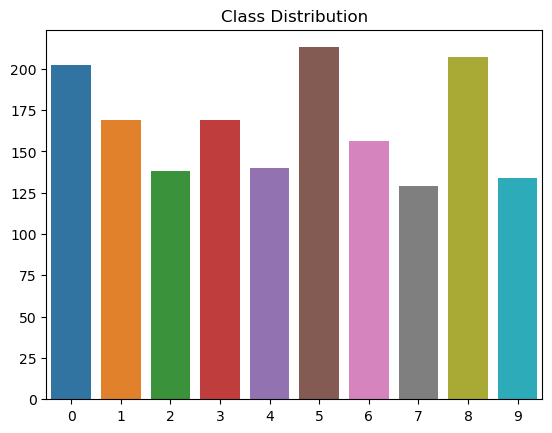

In [27]:
class_distribution = Counter(train_data.classes)

sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))

plt.title('Class Distribution')

plt.show() 

# Build the CNN Model

In [28]:
# Build CNN model using Sequential
model = Sequential()

# Add convolutional layers followed by pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(hgt, wdt, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flatten layer to convert the 2D data to 1D
model.add(Flatten())

# Add a dense layer followed by a dropout layer
model.add(Dense(128, activation='relu'))

# Dropout layer with rate 0.05 to prevent overfitting
model.add(Dropout(0.05))

# Output layer with softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))  # 11 classes based on your dataset

## Compile the Model

In [29]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [30]:
history = model.fit(train_data,
                    epochs=25,
                    validation_data=validation_data,
                    verbose=1)  # Set verbose to 1 to see progress per epoch

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 285s 5s/step - accuracy: 0.2642 - loss: 2.1903 - val_accuracy: 0.7959 - val_loss: 0.5735
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 235s 5s/step - accuracy: 0.7773 - loss: 0.6080 - val_accuracy: 0.8571 - val_loss: 0.3648
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step - accuracy: 0.8762 - loss: 0.3494 - val_accuracy: 0.9388 - val_loss: 0.2223
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.9086 - loss: 0.2634 - val_accuracy: 0.8878 - val_loss: 0.3619
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.9220 - loss: 0.2231 - val_accuracy: 0.9490 - val_loss: 0.1881
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.9263 - loss: 0.2207 - val_accuracy: 0.9082 - val_loss: 0.2660
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.9474 - loss: 0.1533 - val_accuracy: 0.9388 - val_loss: 0.1694
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.9600 - loss: 0.1261 - val_accuracy: 0.9388 - v

## Evaluating the Model

In [31]:
# Evaluating the model on validation data
val_loss, val_accuracy = model.evaluate(validation_data)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9907 - loss: 0.0291
Validation Loss: 0.027019256725907326
Validation Accuracy: 0.9897959232330322


## Plot Training and Validation Accuracy & Loss

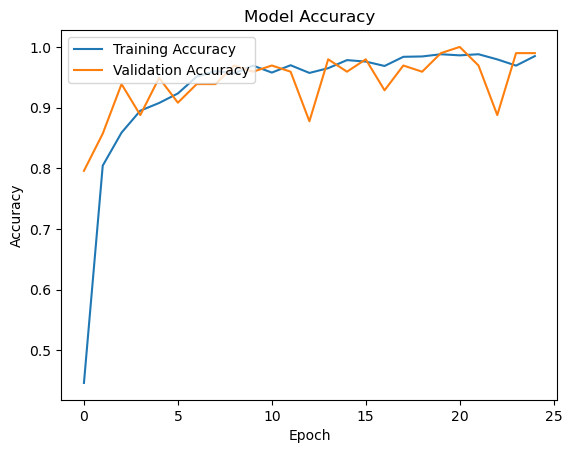

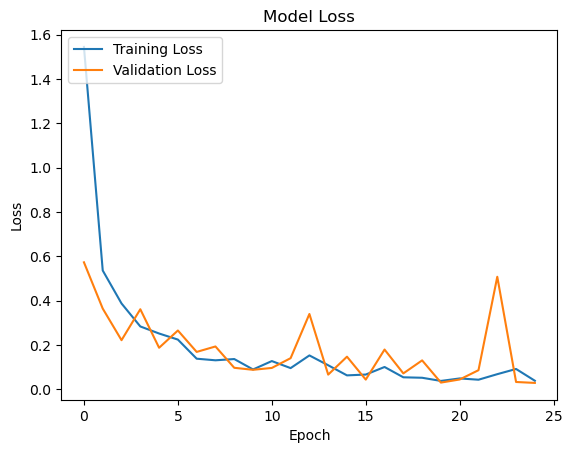

In [32]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

## Plot Some Sample Images with Class Names

In [33]:
class_names = ['Apple' 'Bean', 'Bread', 'Cheese', 'Egg', 'Onion', 'Orange', 'Pasta', 'Tomato', 'sauce']

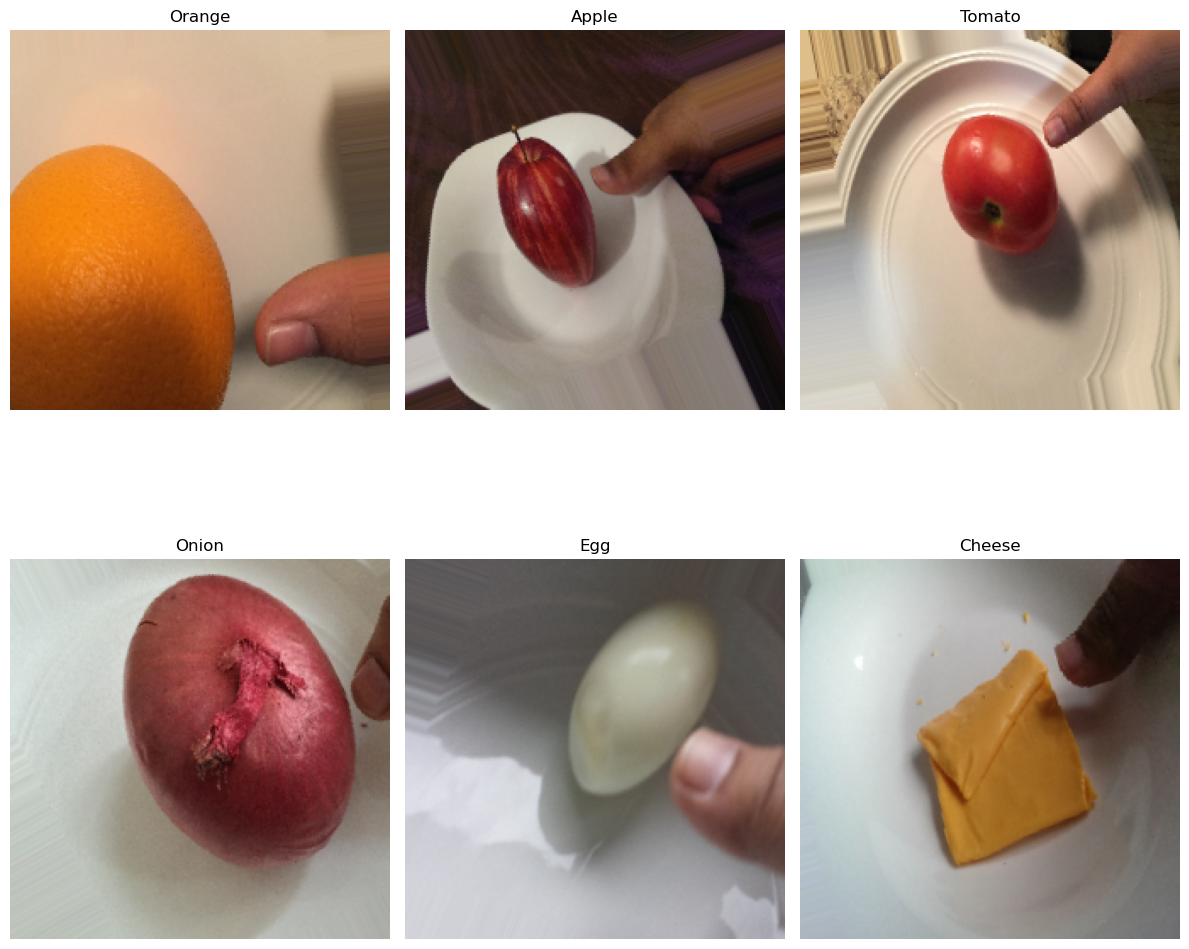

In [35]:
# Plot some sample images
def plot_sample_images(data_generator, class_indices, num_samples=6):
    plt.figure(figsize=(12, 12))
    
    # Retrieve one batch of images and labels
    images, labels = next(data_generator)
    
    # Reverse the class_indices dictionary to map index to class names
    idx_to_class = {v: k for k, v in class_indices.items()}
    
    for i in range(num_samples):
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
        plt.imshow(images[i])
        
        # Get the class label index and map it to class name
        class_idx = np.argmax(labels[i])
        class_name = idx_to_class[class_idx]
        
        plt.title(class_name)
        plt.axis('off')
    
    # Automatically adjust subplots to minimize gaps
    plt.tight_layout()
    plt.show()

# Call the function to plot sample images using train_data.class_indices
plot_sample_images(train_data, train_data.class_indices)

## Unit Testing

In [42]:
import unittest
import numpy as np
import tensorflow as tf  

class TestCNNModel(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        
        cls.model = model  # Using the model already loaded in the notebook

    def test_empty_input(self):
        """Test model with empty input"""
        empty_image = np.array([]).reshape(0, 0, 3)  # Empty image input
        with self.assertRaises(tf.errors.InvalidArgumentError):
            self.model.predict(np.expand_dims(empty_image, axis=0))

    def test_extreme_image_sizes(self):
        """Test model with extreme image sizes (small and large)"""
        
        # Get the expected input size from the model
        input_shape = self.model.input_shape[1:3]  # Assuming input shape is (None, height, width, channels)

        # Generate a very small image
        small_image = np.random.rand(1, 1, 3) * 255

        # Generate a large image resized to the expected input size
        large_image = np.random.rand(*input_shape, 3) * 255

        # Test small image (this should still raise an error)
        with self.assertRaises(tf.errors.InvalidArgumentError):
            self.model.predict(np.expand_dims(small_image, axis=0))

        # Test large image resized to the expected input shape
        result = self.model.predict(np.expand_dims(large_image, axis=0))
        self.assertEqual(result.shape[1], 10)  # Assuming 10 output classes

    def test_grayscale_image(self):
        """Test model with grayscale image"""
        grayscale_image = np.random.rand(224, 224) * 255
        grayscale_image = np.stack([grayscale_image] * 3, axis=-1)  # Convert to 3-channel image
        result = self.model.predict(np.expand_dims(grayscale_image, axis=0))
        self.assertEqual(result.shape[1], 10)  # Assuming 10 output classes

    def test_unseen_classes(self):
        """Test model with unseen class (random noise)"""
        unseen_image = np.random.rand(224, 224, 3) * 255
        result = self.model.predict(np.expand_dims(unseen_image, axis=0))
        self.assertEqual(result.shape[1], 10)  # Assuming 10 output classes

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)  # This allows us to run the tests 


.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


.
----------------------------------------------------------------------
Ran 4 tests in 0.770s

OK
